In [136]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime


In [137]:
import requests as re
import re # for regex
import nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [138]:
now = datetime.now()
 
print("date..............:", now)

date..............: 2023-05-17 21:29:32.418735


In [139]:
#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset
#df_reviews = pd.read_csv('../dataset/out.csv') # small part of the dataset

# dataset size:
print(f'Numero de linha: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Numero de linha: 568454, numero de colunas: 10


In [140]:
# parte do dataset
df_reviews_small = df_reviews.copy()
df_reviews = df_reviews_small.sample(10000) # FIXME remover no final

In [141]:
# Lista valores faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [142]:
# dataset - tamanho
df_reviews.shape

(10000, 10)

In [143]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [144]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [145]:
df_reviews.shape

(9999, 10)

In [146]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [147]:
df_reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
91608,91609,B002DY1B6S,A1HD3PLNVIB0KU,PS VIDEO,1,1,5,1308700800,Love this Tea,I actually Mix the Tea with an equal amount of...
396554,396555,B001M074Q0,AGZM539UJ6AZT,Natascha,6,6,5,1250985600,Thank you!!!,"Being born to dutch parents, I grew up on Dutc..."
32188,32189,B000FA15RW,A242OBYMOHU8SH,"acolala ""acolala""",1,1,5,1252713600,Great Price!,"These arrived fresh and in very good shape, Ju..."


In [148]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

5    6399
4    1462
1     897
2     534
Name: Score, dtype: int64

In [149]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [150]:
df_reviews["negative"].value_counts()

0    7861
1    1431
Name: negative, dtype: int64

In [151]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

'I actually Mix the Tea with an equal amount of coffee. The cinnamin "Bites" your toung as you sip it. Wish it didn\'t have cloves in it, but I got used to it and now don\'t taste the cloves.Being born to dutch parents, I grew up on Dutch black licorice.  I was devastated when I found out they make it with gluten!!  This licorice is delicious...it could be saltier and stronger flavored for my taste buds but then again my fav dutch licorice is the double salt.  I have to hide this licorice from my husband so he doesn\'t eat it all!  LOL!!These arrived fresh and in very good shape, Just like buying from the local store only cheaper and delivered to my door!Great culinary cooking. Got it with a lavender cook book and have been impressing my friends with the gentle, subtle flavor of the lavender. A little goes a long way and there is a lot of lavender here so it can easily be used for all sorts of dishes. Makes a great way (with a little sugar) to brighten up a lavender Margarita -rim the 

In [152]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [153]:
import string
from collections import Counter
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]

freqdist = Counter(list_words)
freqdist.most_common(20)

[('br', 4366),
 ('like', 4072),
 ('good', 3042),
 ('one', 2799),
 ('taste', 2638),
 ('coffee', 2579),
 ('great', 2552),
 ('flavor', 2236),
 ('product', 2156),
 ('food', 2072),
 ('love', 2025),
 ('tea', 2003),
 ('would', 1961),
 ('get', 1812),
 ('really', 1701),
 ('much', 1449),
 ('also', 1424),
 ('use', 1397),
 ('little', 1263),
 ('tried', 1252)]

In [154]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

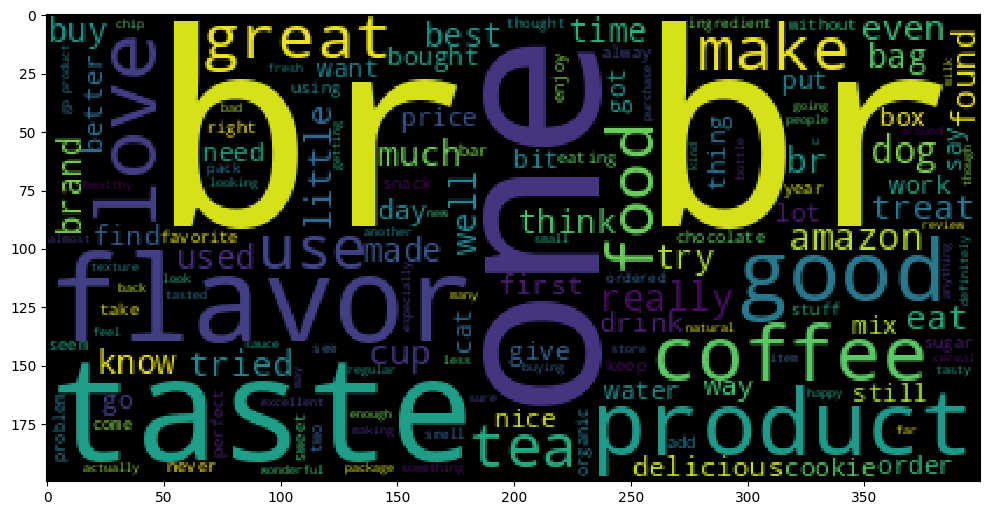

In [155]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()